In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

Dataset has 7043 rows and 21 columns including the label v=column.

In [5]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Dataset has one identifier columns, 3 continuos and rest of them are categorical columns.

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values.

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are 3 columns with numerical columns rest all object types including the Total charges column.

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Dataset is imbalanced

In [9]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

There is no skewness in the continuous column.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Count of every column is 7043. Mean is higher than median in tenure colum, and lower in Monthly charges. Both the columns show a little skewness. Difference between the interquartile range, min and max dosent vary much that means there are less outliers. There are high variance in tenure and Monthtly charges column.

### Univariate Analysis

In [11]:
#Separating categorical and continuous features
cat=[i for i in df.columns if df[i].nunique()<10 ]
cont=[i for i in df.columns if df[i].nunique()>10 and i!='customerID']

No     5174
Yes    1869
Name: Churn, dtype: int64

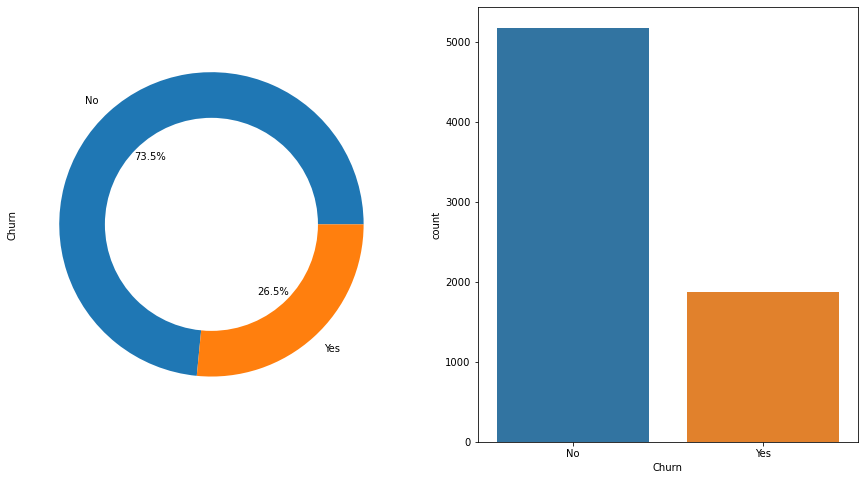

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Churn',data=df)
df['Churn'].value_counts()

Dataset is imbalanced there are 73.5% people who have not churned while 26.5% who have.

Male      3555
Female    3488
Name: gender, dtype: int64

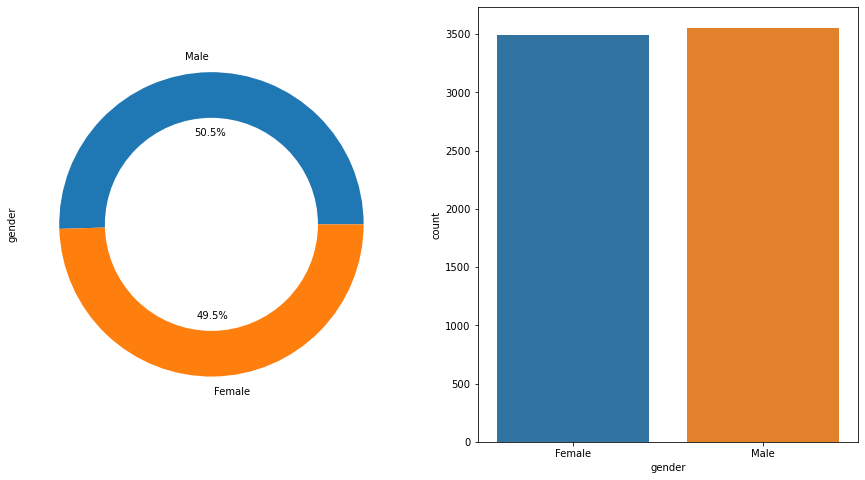

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['gender'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='gender',data=df)
df['gender'].value_counts()

No. of females and males are almost equal.

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

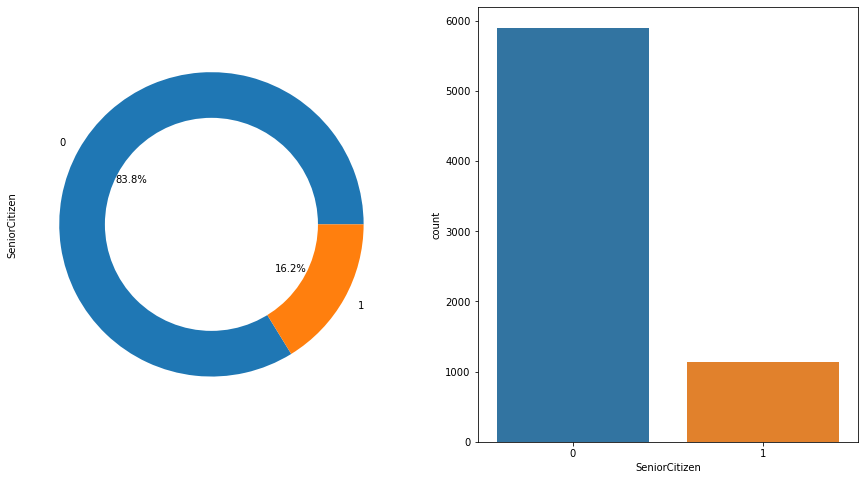

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='SeniorCitizen',data=df)
df['SeniorCitizen'].value_counts()

There are only 16.2% senior citizens, while the majority of customers are young.

No     3641
Yes    3402
Name: Partner, dtype: int64

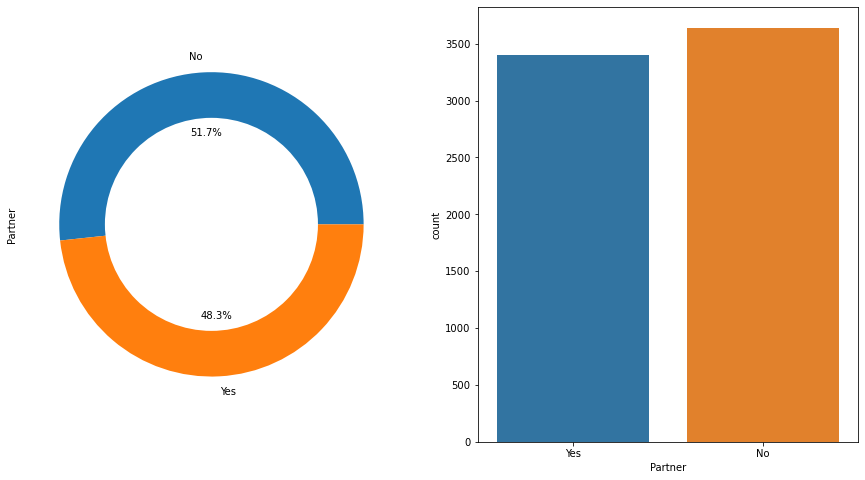

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Partner',data=df)
df['Partner'].value_counts()

Partner category is almost equal as customers having partners while no. of people without partners are almost equal.

No     4933
Yes    2110
Name: Dependents, dtype: int64

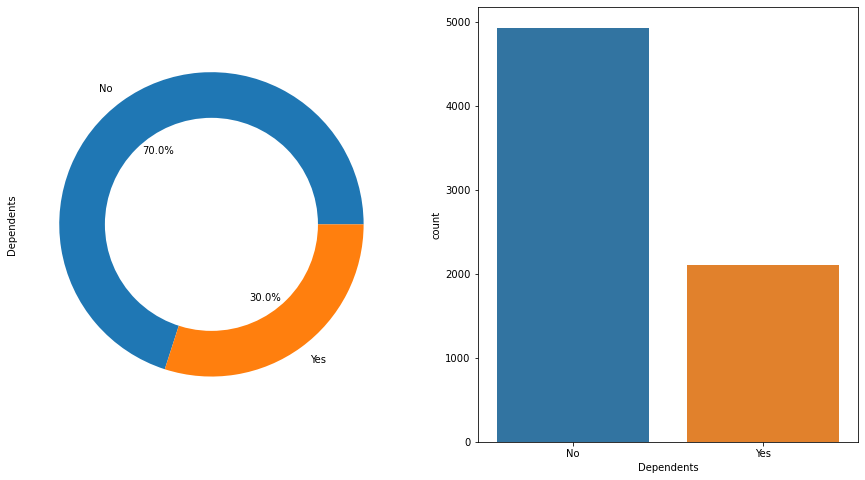

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Dependents',data=df)
df['Dependents'].value_counts()

There are 30% customers with dependents while rest donot.

Yes    6361
No      682
Name: PhoneService, dtype: int64

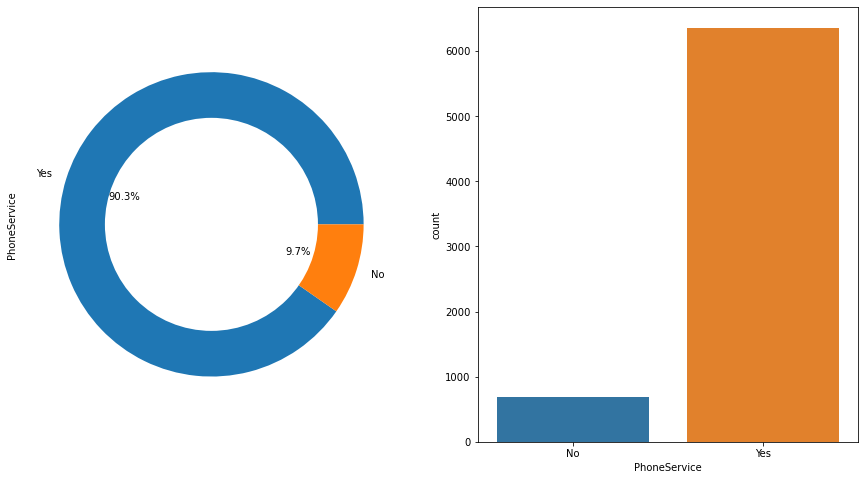

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='PhoneService',data=df)
df['PhoneService'].value_counts()

There are very few customers who do not have phone service, less than 10%.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

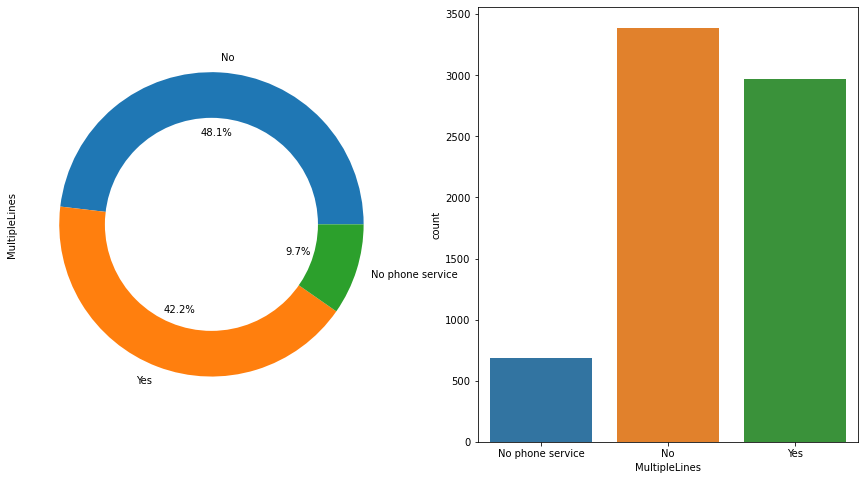

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='MultipleLines',data=df)
df['MultipleLines'].value_counts()

There are 90.3% people who use phone service and 42.2% who also use multiple lines among them.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

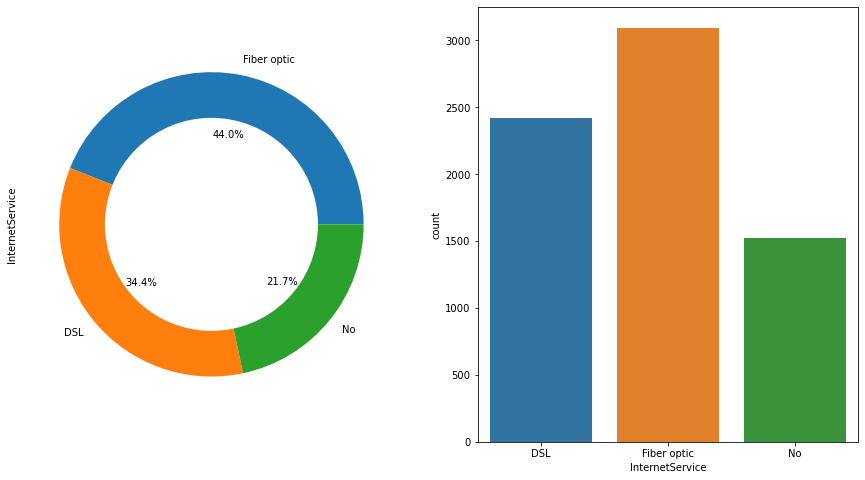

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='InternetService',data=df)
df['InternetService'].value_counts()

Most of the people using Internet service use Fiber optic instead of DSL, while 21.7% donot use internet service

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

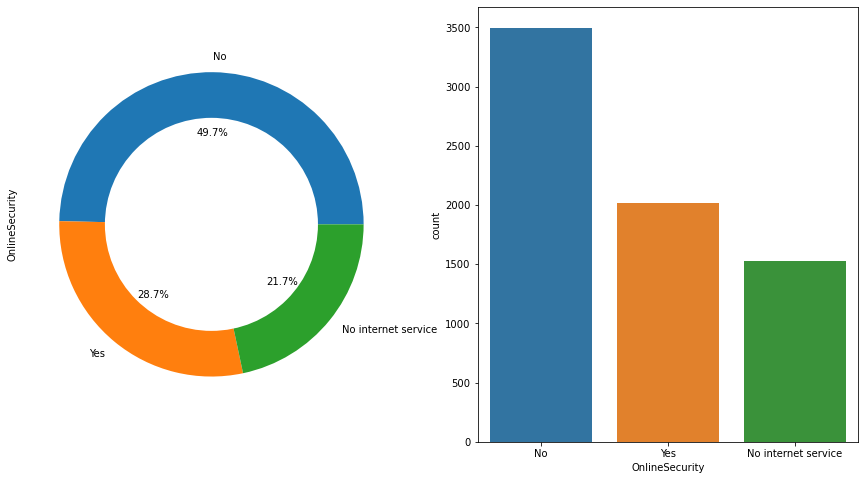

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='OnlineSecurity',data=df)
df['OnlineSecurity'].value_counts()

Majority of customers do not use Online security service among the people who use internet but still there are more than half who use online security.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

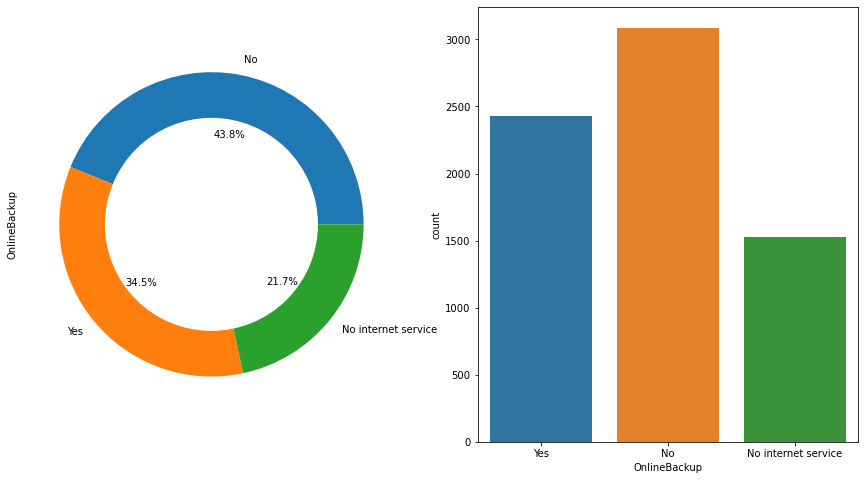

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='OnlineBackup',data=df)
df['OnlineBackup'].value_counts()

Majority of customers do use Online Backup service among the people who use internet but still there are more than half who do not use online backup service service,

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

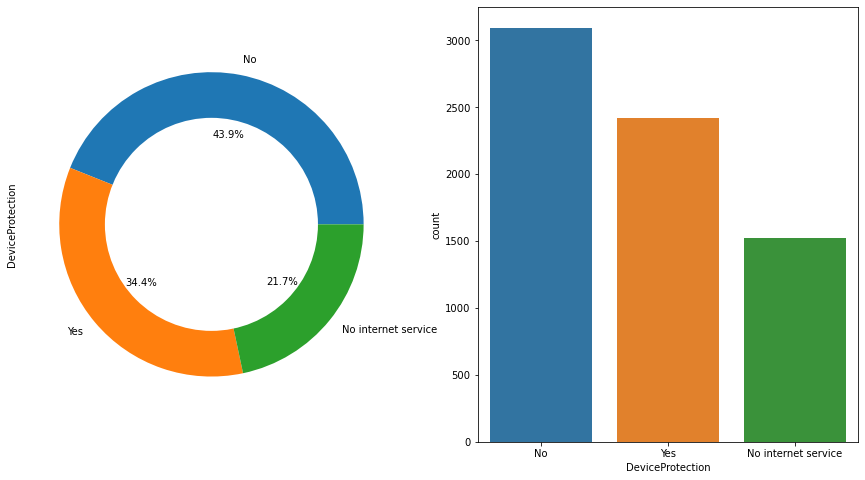

In [22]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='DeviceProtection',data=df)
df['DeviceProtection'].value_counts()

Customers who use internet service are the ones who can use this service. Majority of people among the internet users do not use this service.

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

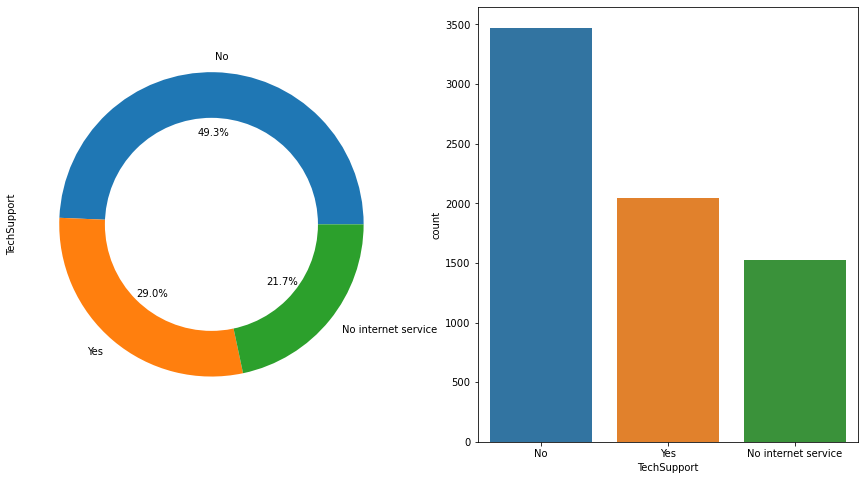

In [23]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='TechSupport',data=df)
df['TechSupport'].value_counts()

Customers who use internet service are the ones who can use this service. Majority of people among the internet users do not use this service.

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

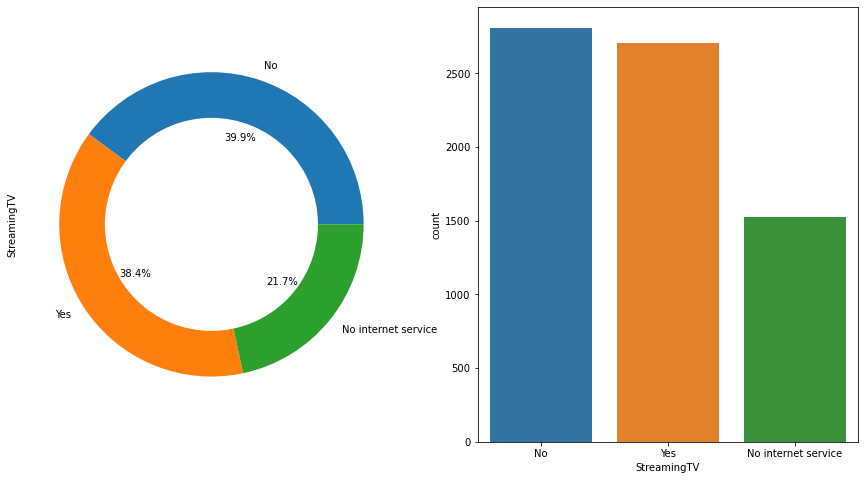

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='StreamingTV',data=df)
df['StreamingTV'].value_counts()

Customers who use internet service are the ones who can use this service. Among the users of customer service, there is balance in the users who Watch Streaming Tv and who do not.

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

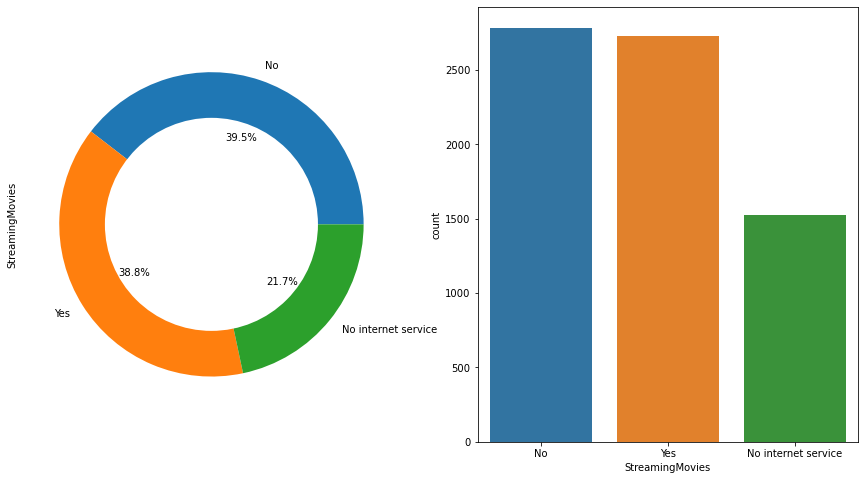

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='StreamingMovies',data=df)
df['StreamingMovies'].value_counts()

Customers who use internet service are the ones who can use this service. Among the users of customer service, there is balance in the users who Watch Streaming Movies and who do not.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

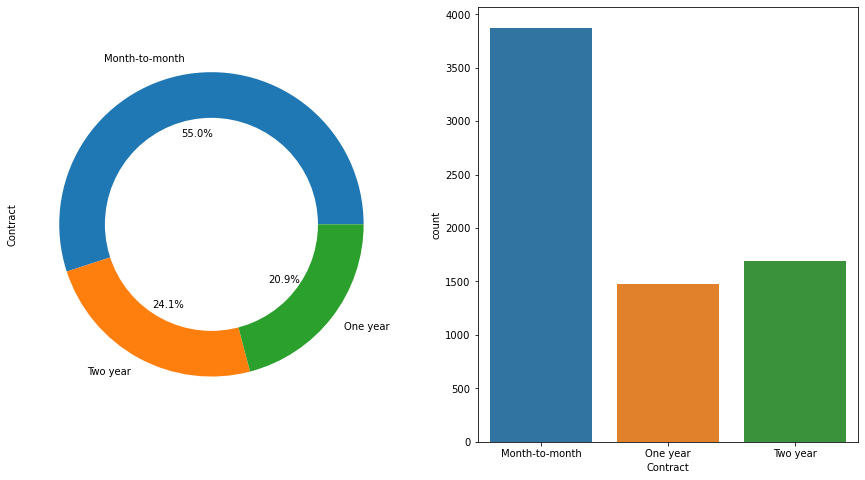

In [26]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Contract'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Contract',data=df)
df['Contract'].value_counts()

Most of the customers have subscribed for month to month followed by two year plan, one year contract is used by least no. of customers.

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

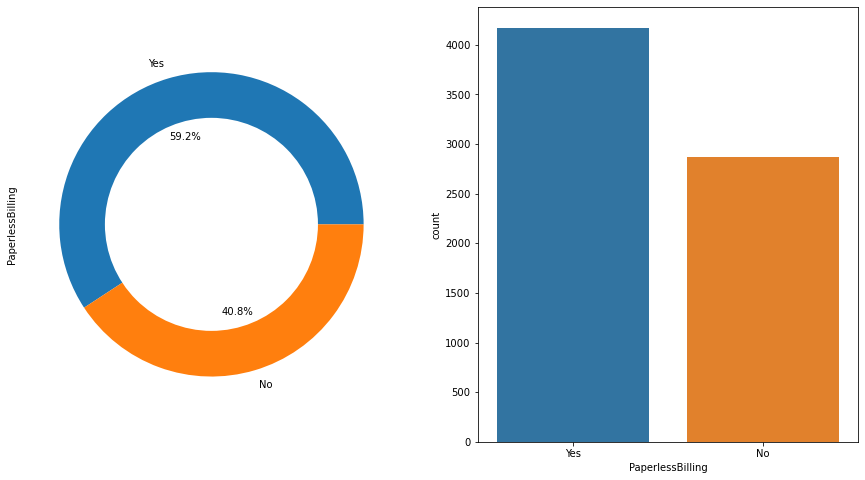

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='PaperlessBilling',data=df)
df['PaperlessBilling'].value_counts()

Most of the customer like paperless billing which is good as it is environment friendly.

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

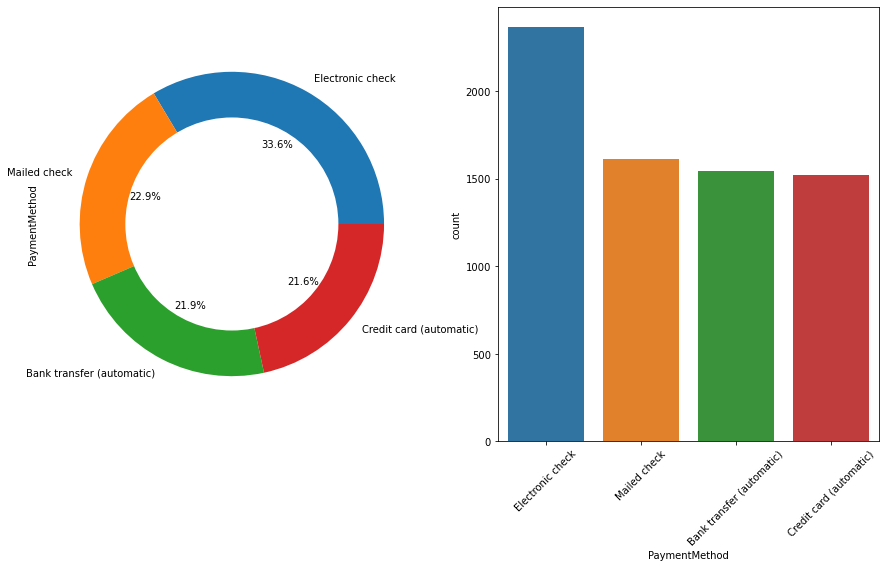

In [28]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='PaymentMethod',data=df)
plt.xticks(rotation=45)
df['PaymentMethod'].value_counts()

Most customers use electronic check for making payments, while rest of the methods are used by almost equal no. of customers.

Minimum 0
Maximum 72


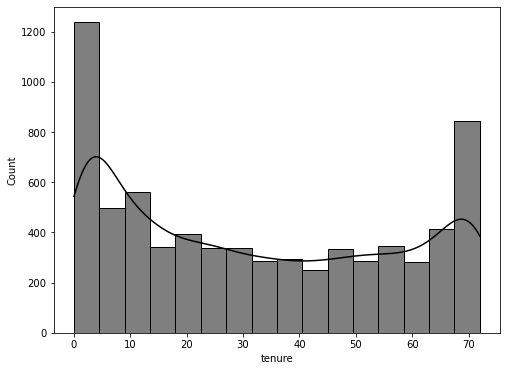

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df['tenure'],kde=True,color='k')
print('Minimum',df['tenure'].min())
print('Maximum',df['tenure'].max())

Tenure data seems to be normally distributed, with just little of roght skewness. Customers as long as 72 years have been loyal to this company, while the majority lies between 0 to 2 years range.

Minimum 18.25
Maximum 118.75


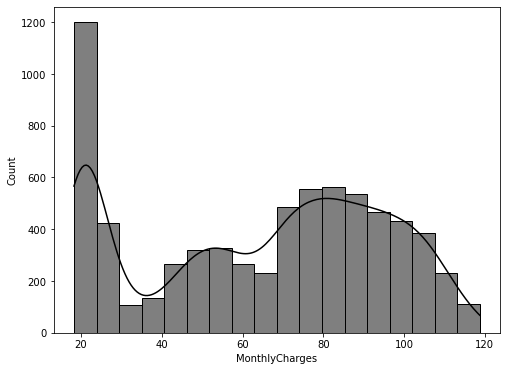

In [30]:
plt.figure(figsize=(8,6))
sns.histplot(df['MonthlyCharges'],kde=True,color='k')
print('Minimum',df['MonthlyCharges'].min())
print('Maximum',df['MonthlyCharges'].max())

Monthly charges almost follows normal distribution, whith its majority of customers paying monthly charges 19 to 25.

In [31]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x: np.NaN if x==' ' else float(x))

Minimum 18.8
Maximum 8684.8


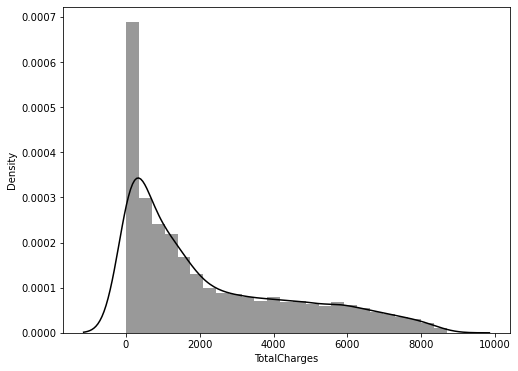

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(df['TotalCharges'],kde=True,color='k')
print('Minimum',df['TotalCharges'].min())
print('Maximum',df['TotalCharges'].max())

Total charges is skewed towards rightand goes up to a range of 8684, while majority of customers lie in 18.8 to 500 range.

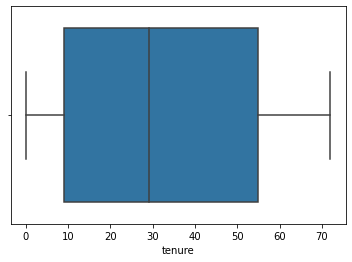

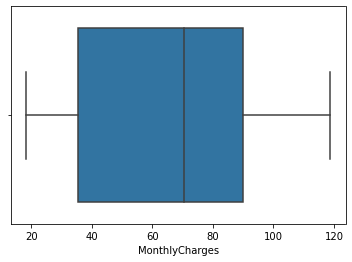

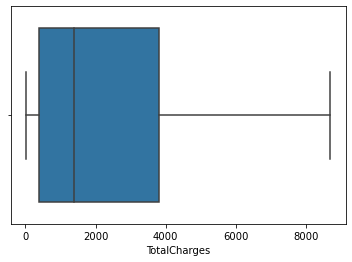

<Figure size 432x288 with 0 Axes>

In [33]:
for i in cont:
    sns.boxplot(df[i])
    plt.figure()

There are no outliers in the above continuous data.

### Bivariate Analysis

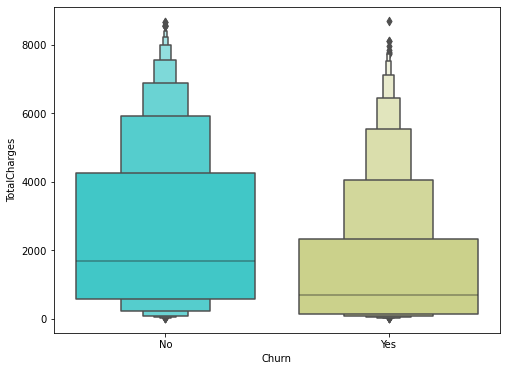

In [34]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Churn',y='TotalCharges',data=df,palette='rainbow')

Customers who have been seen to pay more total charges dosent seem to churn.

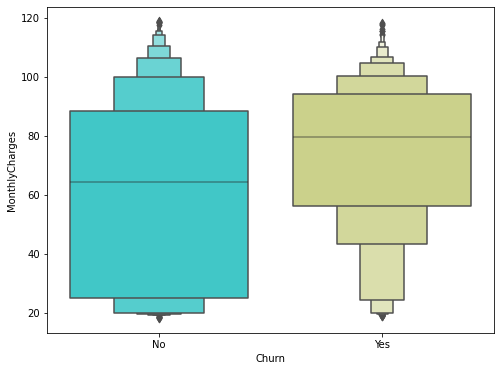

In [35]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Churn',y='MonthlyCharges',data=df,palette='rainbow')

Customers paying high mean monthly charges seem to churn away.

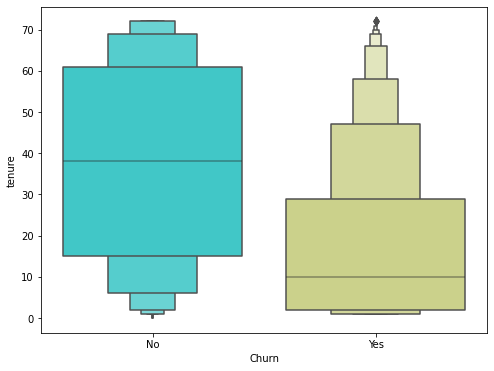

In [36]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='Churn',y='tenure',data=df,palette='rainbow')

People who have stayed customers for longer term does not seem to churn away.

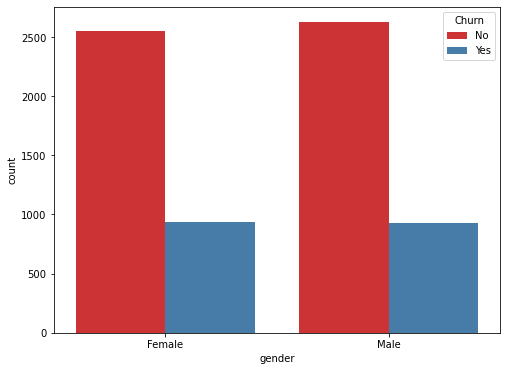

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(df['gender'],hue=df['Churn'],palette='Set1')

There are almost equal no of males and females who churn away but no. of people churning are way lower than peole who do not.

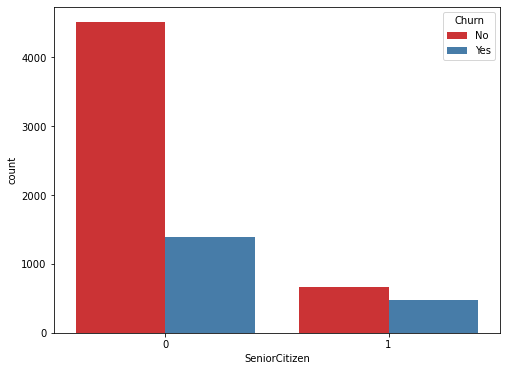

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(df['SeniorCitizen'],hue=df['Churn'],palette='Set1')

As Compared to younger ones senior citizens seem to churn easily.

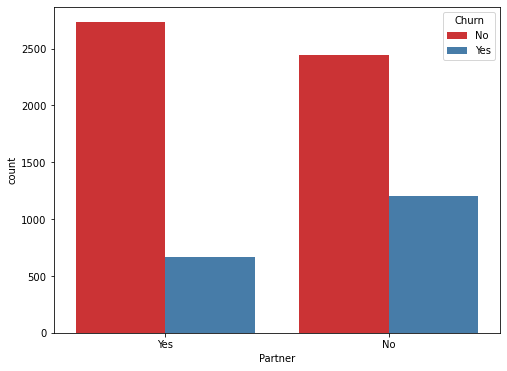

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(df['Partner'],hue=df['Churn'],palette='Set1')

Customers who do not have partners have higher chances of churning.

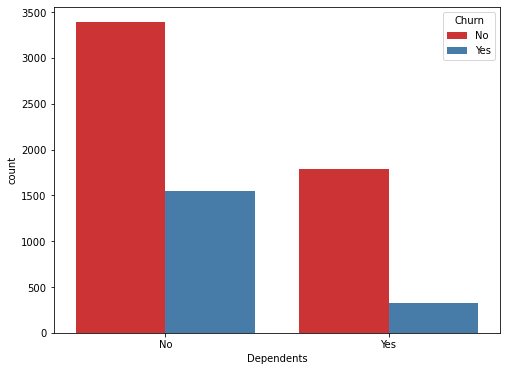

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(df['Dependents'],hue=df['Churn'],palette='Set1')

Customers with depemdemts have lower rate of churning than the customers who do not have partners.

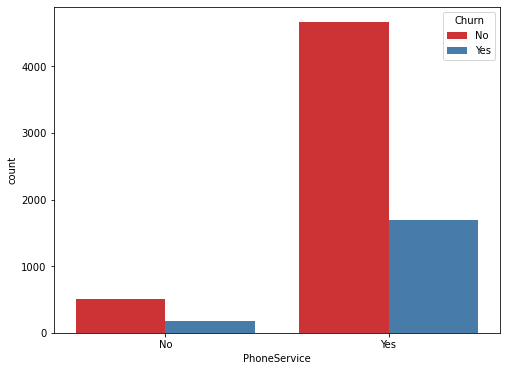

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(df['PhoneService'],hue=df['Churn'],palette='Set1')

No. of people churning are almost same in the ratio of people who use phone service and who do not.

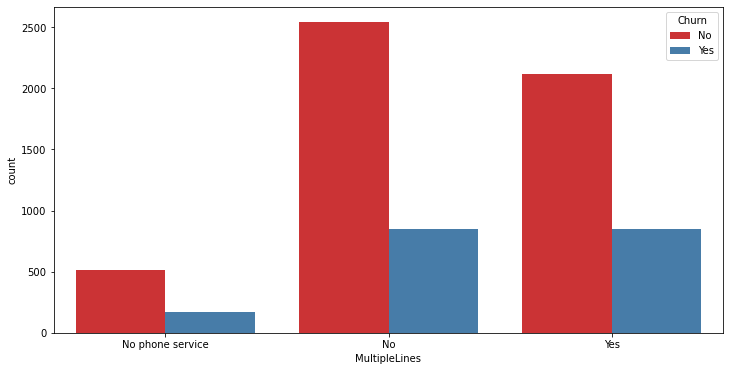

In [42]:
plt.figure(figsize=(12,6))
sns.countplot(df['MultipleLines'],hue=df['Churn'],palette='Set1')

People using multiple lines have lower ratio of churning compared to customers who donot use multiple lines.

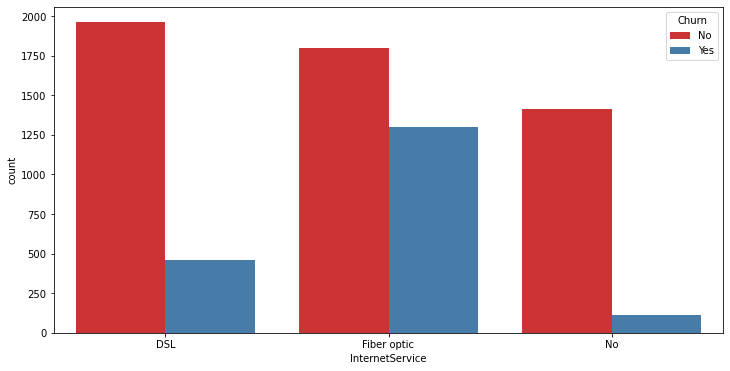

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(df['InternetService'],hue=df['Churn'],palette='Set1')

Customers using fiber optic internet service are the highest no. of people churning away.

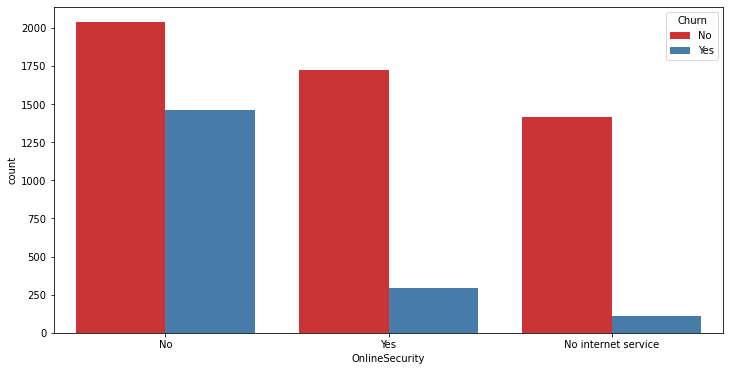

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(df['OnlineSecurity'],hue=df['Churn'],palette='Set1')

Customers who have not subscrobed online security churn the most.

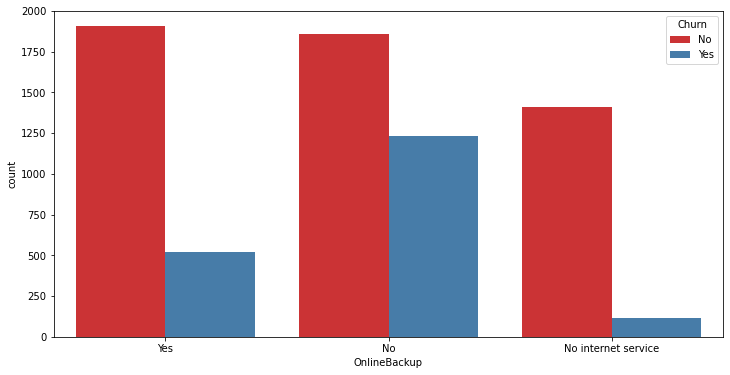

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(df['OnlineBackup'],hue=df['Churn'],palette='Set1')

Customers who have not subscribed for online backup have higher ratio for churning away.

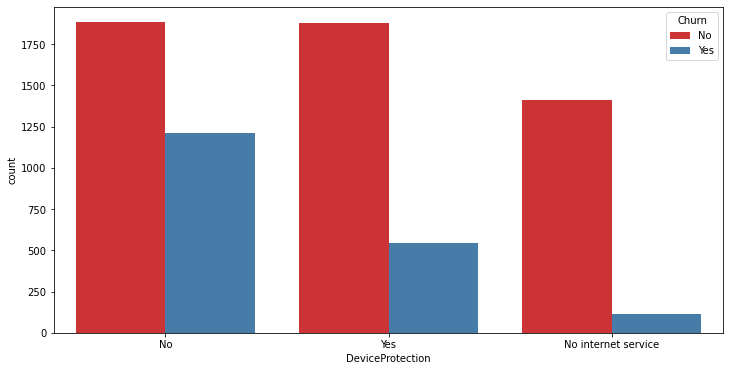

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(df['DeviceProtection'],hue=df['Churn'],palette='Set1')

Customers who do not opt for device protection have highest no. of churning away.

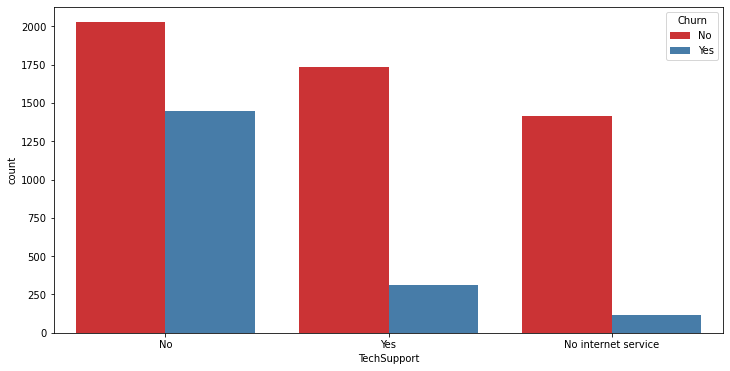

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(df['TechSupport'],hue=df['Churn'],palette='Set1')

Customers who do not opt for tech support have highest no. of churning away.

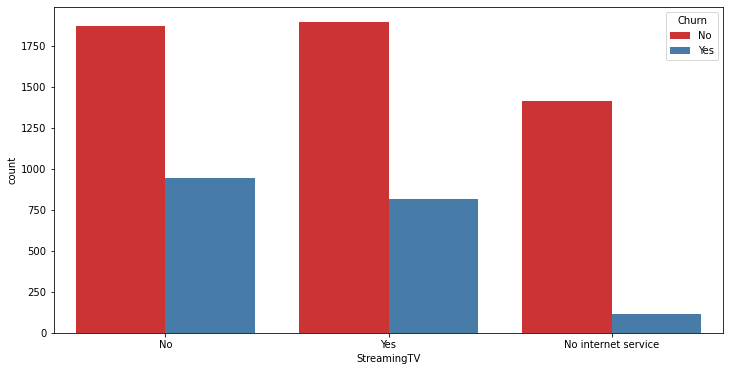

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(df['StreamingTV'],hue=df['Churn'],palette='Set1')

Customers who have subscribed for streaming tv have skightly lower ratio of churning compared to those who have't while customers who do not use internet service churn the least.

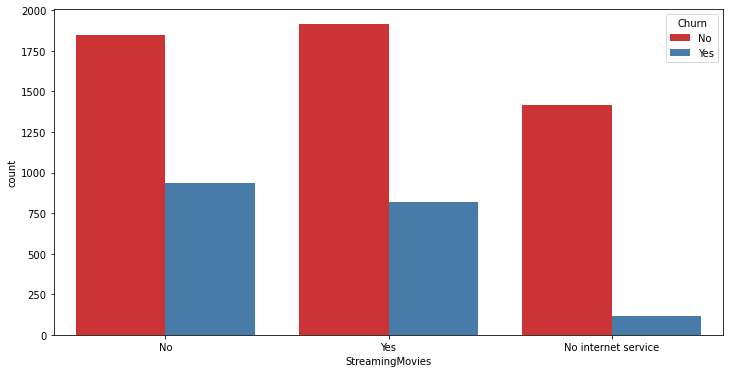

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(df['StreamingMovies'],hue=df['Churn'],palette='Set1')

Customers who have subscribed for streaming Movies have slightly lower ratio of churning compared to those who have't while customers who do not use internet service churn the least.

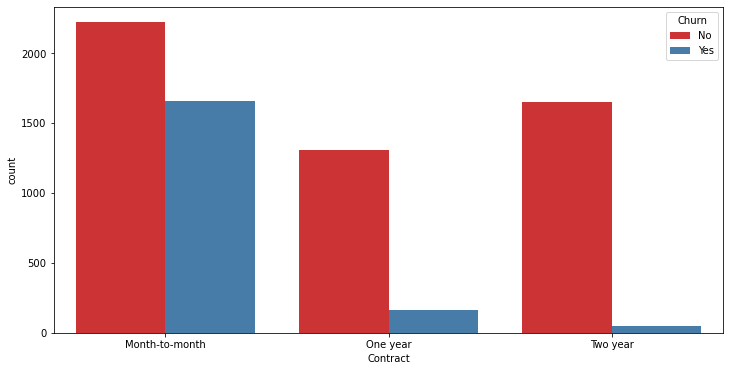

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(df['Contract'],hue=df['Churn'],palette='Set1')

People having shorter contract churn higher than the people who have contract for a longer time.

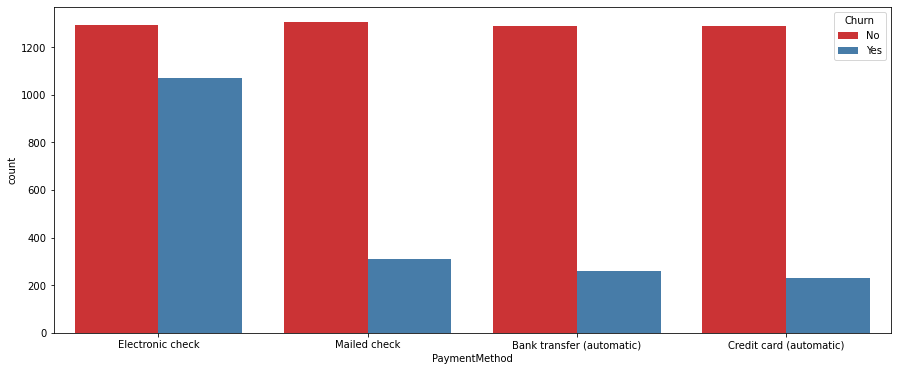

In [51]:
plt.figure(figsize=(15,6))
sns.countplot(df['PaymentMethod'],hue=df['Churn'],palette='Set1')

People payong bills through electronic check have the highest ratio for churning compared to people who use other medium for payment.

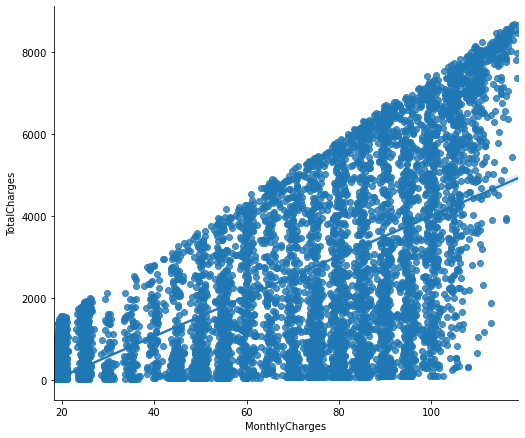

In [52]:
sns.lmplot(x='MonthlyCharges',y='TotalCharges',data=df,height=6, aspect=1.2)

Total charges and monthly charges show positive correlation, one increases as the other increases.

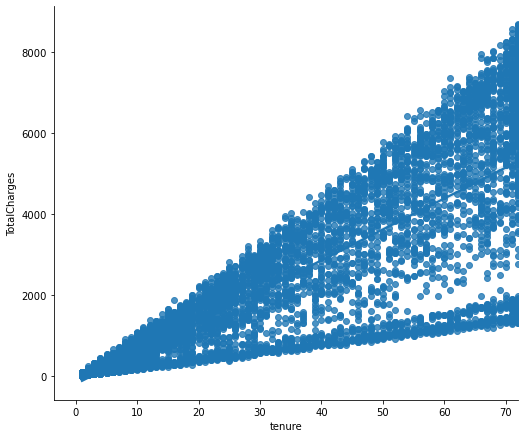

In [53]:
sns.lmplot(x='tenure',y='TotalCharges',data=df,height=6, aspect=1.2,)

Total charges and tenure also show positive correlation, one increases as the other increases.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

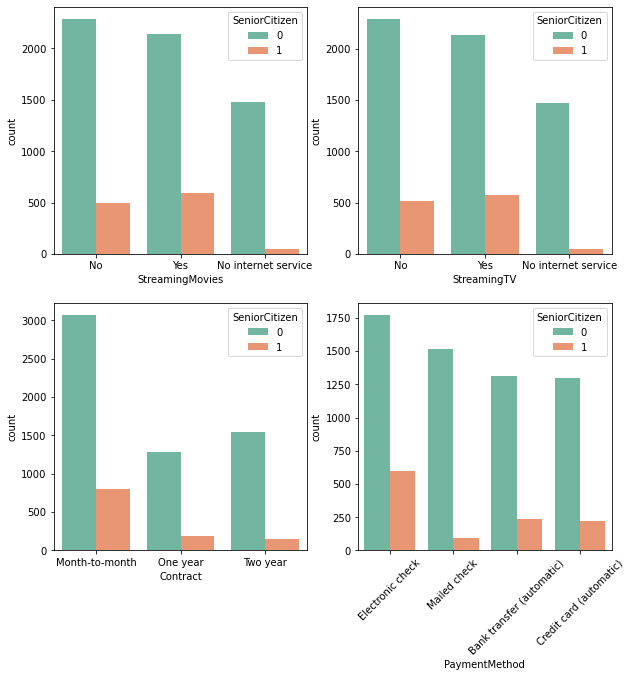

In [54]:
#Senior citizen vs other features.
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(df['StreamingMovies'],hue=df['SeniorCitizen'],palette='Set2')

plt.subplot(2,2,2)
sns.countplot(df['StreamingTV'],hue=df['SeniorCitizen'],palette='Set2')

plt.subplot(2,2,3)
sns.countplot(df['Contract'],hue=df['SeniorCitizen'],palette='Set2')

plt.subplot(2,2,4)
sns.countplot(df['PaymentMethod'],hue=df['SeniorCitizen'],palette='Set2')
plt.xticks(rotation=45)


Senior citizens have a higher ratio of streaming tv and movies than the younger ones. Ratio of senior citizens for contract is almost similar in all the categories while for payment method. senior citizens using mailed checks are least.

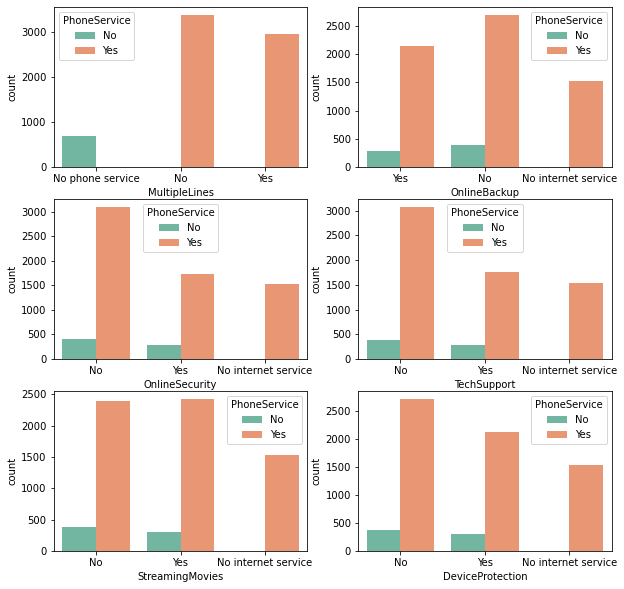

In [55]:
#Phone service vs other features.
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(df['MultipleLines'],hue=df['PhoneService'],palette='Set2')

plt.subplot(3,2,2)
sns.countplot(df['OnlineBackup'],hue=df['PhoneService'],palette='Set2')

plt.subplot(3,2,3)
sns.countplot(df['OnlineSecurity'],hue=df['PhoneService'],palette='Set2')

plt.subplot(3,2,4)
sns.countplot(df['TechSupport'],hue=df['PhoneService'],palette='Set2')

plt.subplot(3,2,5)
sns.countplot(df['StreamingMovies'],hue=df['PhoneService'],palette='Set2')

plt.subplot(3,2,6)
sns.countplot(df['DeviceProtection'],hue=df['PhoneService'],palette='Set2')

Phone Service dosent seem to be an important feature as there is already a category in other features of no phone service and those who do not use internet service  are the ones who not use phone service. 

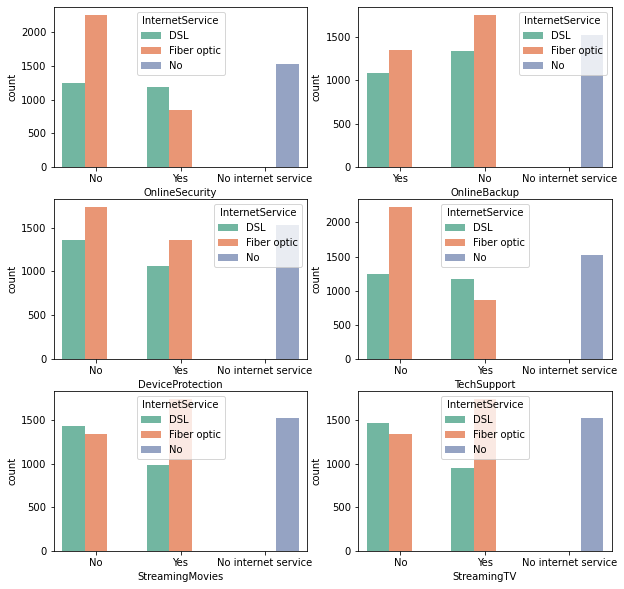

In [56]:
#Internet Service vs other features.
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.countplot(df['OnlineSecurity'],hue=df['InternetService'],palette='Set2')

plt.subplot(3,2,2)
sns.countplot(df['OnlineBackup'],hue=df['InternetService'],palette='Set2')

plt.subplot(3,2,3)
sns.countplot(df['DeviceProtection'],hue=df['InternetService'],palette='Set2')

plt.subplot(3,2,4)
sns.countplot(df['TechSupport'],hue=df['InternetService'],palette='Set2')

plt.subplot(3,2,5)
sns.countplot(df['StreamingMovies'],hue=df['InternetService'],palette='Set2')

plt.subplot(3,2,6)
sns.countplot(df['StreamingTV'],hue=df['InternetService'],palette='Set2')

People who do not have internet service do not use the above features. Customers having fiber optic have higher ratio of not opting for Online Security, Device Protection and tech Support while customers having DSL internet service have a higher ratio of opting for these services and there is a vice versa scenario for  Online Backup, Streaming MOvies and Tv services.

### Multivariate Analysis

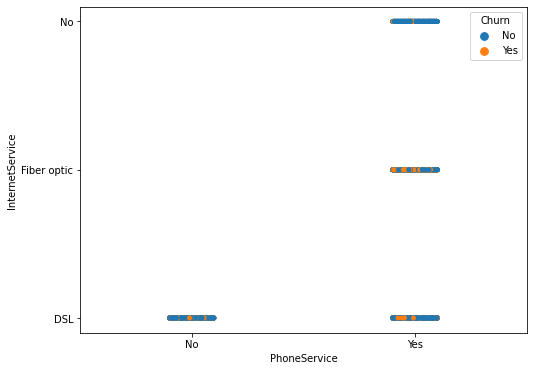

In [57]:
plt.figure(figsize=(8,6))
sns.stripplot(x='PhoneService',y='InternetService',hue='Churn',data=df)

People who do not have phone service only use DSL internet service. While People using the phone service and who do not use internet service are the ons's who rarely churn.

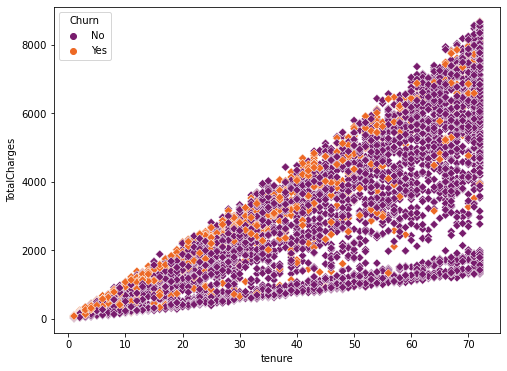

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure',y='TotalCharges',hue='Churn',data=df,palette='inferno',marker='D')

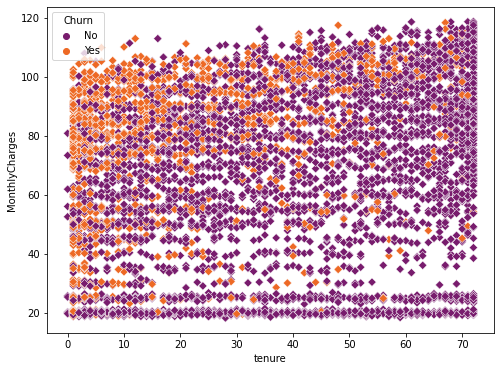

In [59]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df,palette='inferno',marker='D')

People having higher tenure and higher monthly charges seem to churn faster than the rest.

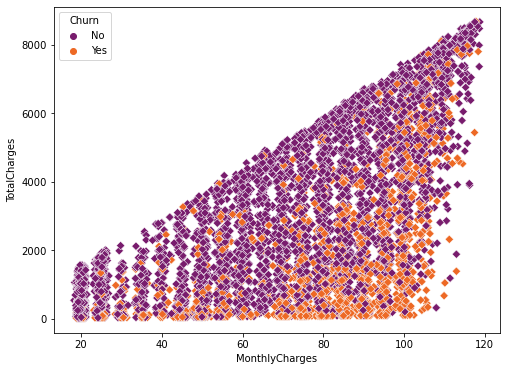

In [60]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',hue='Churn',data=df,palette='inferno',marker='D')

People having lowe total charges and higher monthly charge have a higher ratio of churning than the rest of the population.

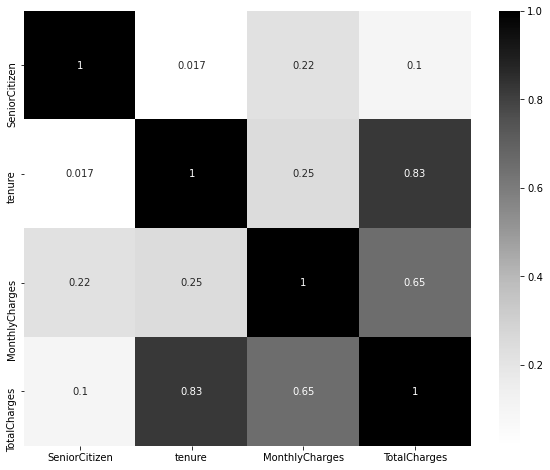

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

There is high correlation between Total charges and tenure. Also a high correlation between Monthlly charges and Total Charges.

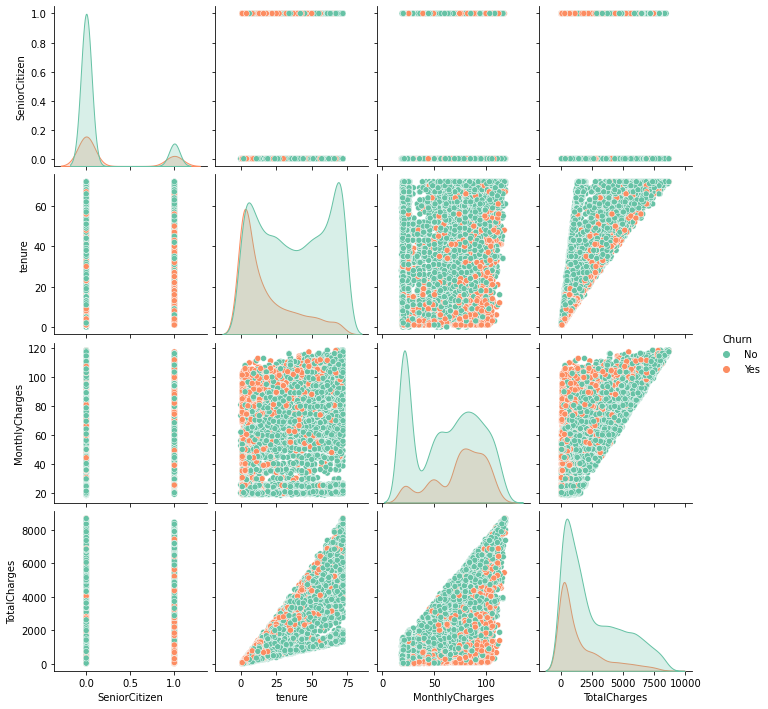

In [62]:
sns.pairplot(df, hue = 'Churn',palette='Set2')

Customers seem to churn away with higher monthly charges, lower tenure and lowe total charges, while the ratio of senior citizen than the young people churning is more.

### Pre Processing Pipeline

##### Dropping identifier columns

In [63]:
df.drop('customerID',axis=1,inplace=True)

##### Handling null values of Total charges column

In [64]:
#Creating pivot table to help fill nan values of visibility from here
table = df.pivot_table(values='TotalCharges', index='InternetService', columns='Contract', aggfunc='mean')
table

Contract,Month-to-month,One year,Two year
InternetService,,,
DSL,830.037776,2526.299737,4279.749278
Fiber optic,1969.714544,5195.592486,6833.673776
No,189.260973,624.347934,1082.660111


In [65]:
def find_mean(x):
    
    return table.loc[x['InternetService'], x['Contract']]

# replace missing values in visibility with mean values from above pivot table
df['TotalCharges'].fillna(df[df['TotalCharges'].isnull()].apply(find_mean, axis=1), inplace=True)

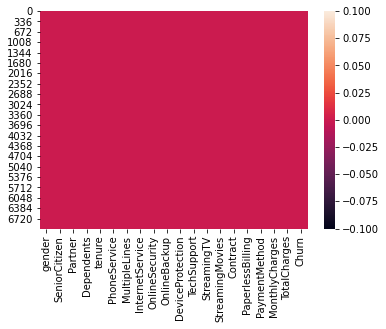

In [66]:
sns.heatmap(df.isnull())

##### Encoding Object type Columns

In [67]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [68]:
#using ordinal encoder for independent features
for i in df.columns:
    if df[i].dtypes=='O' and i!='Churn':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Using label encoder for Label Column
df['Churn']=l.fit_transform(df['Churn'])

##### There are no outliers or skewness in our dataset therefore we proceed further.

In [69]:
x=df.copy()
x.drop('Churn',axis=1,inplace=True)
y=df['Churn']

##### Handling Imbalanced Dataset

In [70]:
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [71]:
x,y=over.fit_resample(x,y)

##### Scaling the Dataset

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [73]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# Building Models

Importong neccessary libraries and modules

In [74]:
from sklearn.model_selection import train_test_split,cross_val_score

In [75]:
#We import Classification Models
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [77]:
#Function to find the best random state
def randomstate(x,y):
    maxx=0
    model=LogisticRegression()
    for i in range(1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=i)
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        accu=accuracy_score(p,ytest)
        if accu>maxx:
            maxx=accu
            j=i
    return j

In [78]:
#Splitting data into train and test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [79]:
#To evaluate performances of all the models
def performance(p,ytest,m,xtest,s):
    print('------------------------------------',m,'------------------------------------')
    print('Accuracy',np.round(accuracy_score(p,ytest),4))
    print('----------------------------------------------------------')
    print('Mean of Cross Validation Score',np.round(s.mean(),4))
    print('----------------------------------------------------------')
    print('AUC_ROC Score',np.round(roc_auc_score(ytest,m.predict_proba(xtest)[:,1]),4))
    print('----------------------------------------------------------')
    print('Confusion Matrix')
    print(confusion_matrix(p,ytest))
    print('----------------------------------------------------------')
    print('Classification Report')
    print(classification_report(p,ytest))

In [80]:
#Creating a list of models which will be created one by one
models=[GaussianNB(),KNeighborsClassifier(),SVC(probability=True),LogisticRegression(),DecisionTreeClassifier(),
        RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier(verbosity=0)]

In [81]:
#Creates and trains model from the models list
def createmodel(trainx,testx,trainy,testy):
    for i in models:
        model=i
        model.fit(trainx,trainy)
        p=model.predict(testx)
        score=cross_val_score(model,x,y,cv=10)
        performance(p,testy,model,testx,score) 

In [82]:
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.775
----------------------------------------------------------
Mean of Cross Validation Score 0.7672
----------------------------------------------------------
AUC_ROC Score 0.8537
----------------------------------------------------------
Confusion Matrix
[[ 964  248]
 [ 334 1041]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1212
           1       0.81      0.76      0.78      1375

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.77      2587
weighted avg       0.78      0.78      0.78      2587

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.7978
----------------------------------------------------------
Mean of Cross Validation Score 0.7782


## Feature Selection

##### Using Feature importance of random forrest

In [83]:
m=RandomForestClassifier()
m.fit(x,y)
print(m.feature_importances_)

[0.02691657 0.01240804 0.03118756 0.03445996 0.11888786 0.00434639
 0.02136492 0.03317412 0.0780563  0.03805233 0.02287797 0.06598389
 0.01652338 0.01600196 0.13805845 0.05853336 0.05225175 0.10859402
 0.12232118]


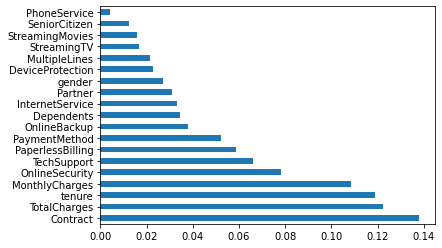

In [84]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(m.feature_importances_, index=x.columns)
feat_importances.nlargest(19).plot(kind='barh')
plt.show()

In [85]:
len(x.columns)

19

In [86]:
fi=list(feat_importances.nlargest(19).index)
fi

['Contract',
 'TotalCharges',
 'tenure',
 'MonthlyCharges',
 'OnlineSecurity',
 'TechSupport',
 'PaperlessBilling',
 'PaymentMethod',
 'OnlineBackup',
 'Dependents',
 'InternetService',
 'Partner',
 'gender',
 'DeviceProtection',
 'MultipleLines',
 'StreamingTV',
 'StreamingMovies',
 'SeniorCitizen',
 'PhoneService']

##### Using chi2 test

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [88]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(x,y)

In [89]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores

,Features,Score
0,gender,0.431464
1,SeniorCitizen,4.532578
2,Partner,191.817301
3,Dependents,305.429202
4,tenure,519.979900
5,PhoneService,0.769304
6,MultipleLines,8.478833
7,InternetService,8.824094
8,OnlineSecurity,704.899423
9,OnlineBackup,263.606389


In [90]:
print(featureScores.nlargest(19,'Score'))  #print10 best features
feat=list(featureScores.nlargest(19,'Score')['Features'])

            Features        Score
14          Contract  1423.024462
8     OnlineSecurity   704.899423
11       TechSupport   610.456203
4             tenure   519.979900
3         Dependents   305.429202
9       OnlineBackup   263.606389
10  DeviceProtection   204.856776
15  PaperlessBilling   201.275746
2            Partner   191.817301
18      TotalCharges   154.294901
17    MonthlyCharges    96.258275
16     PaymentMethod    31.884069
7    InternetService     8.824094
13   StreamingMovies     8.714128
6      MultipleLines     8.478833
12       StreamingTV     6.842902
1      SeniorCitizen     4.532578
5       PhoneService     0.769304
0             gender     0.431464


On the basis of above two method of feature selection 'PhoneService','gender' and 'SeniorCitizen' seem to have the lowest scores so we try to remove them and see if our accuracy increases.

In [91]:
#We create a function to test the performance of dataset after removing above features.
#We use Random Forest and XGBClassifier as our models to test as they were giving the best results.
def feature_test(xtrain,xtest,ytrain,ytest):
    model=RandomForestClassifier()
    model.fit(xtrain,ytrain)
    score=cross_val_score(model,xd,y,cv=10)
    p=model.predict(xtest)
    print("Random Forest")
    print('Accuracy Score',accuracy_score(p,ytest))
    print('Cross Validation Score',score.mean())
    model=XGBClassifier()
    model.fit(xtrain,ytrain)
    score=cross_val_score(model,xd,y,cv=10)
    p=model.predict(xtest)
    print("XGBCLassifier")
    print('Accuracy Score',accuracy_score(p,ytest))
    print('Cross Validation Score',score.mean())

In [92]:
xd=x.drop(['PhoneService','gender','SeniorCitizen'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.25,random_state=randomstate(xd,y))
feature_test(x_train,x_test,y_train,y_test)

Random Forest
Accuracy Score 0.8678005411673754
Cross Validation Score 0.8520650538689392
XGBCLassifier
Accuracy Score 0.8546579049091612
Cross Validation Score 0.846654519290967


In [93]:
xd=x.drop(['PhoneService','gender'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.25,random_state=randomstate(xd,y))
feature_test(x_train,x_test,y_train,y_test)

Random Forest
Accuracy Score 0.8569771936606108
Cross Validation Score 0.8527411954886516
XGBCLassifier
Accuracy Score 0.8542713567839196
Cross Validation Score 0.8478133789327128


In [94]:
xd=x.drop(['PhoneService'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(xd,y,test_size=0.25,random_state=randomstate(xd,y))
feature_test(x_train,x_test,y_train,y_test)

Random Forest
Accuracy Score 0.853884808658678
Cross Validation Score 0.8535144226726095
XGBCLassifier
Accuracy Score 0.853884808658678
Cross Validation Score 0.8477175081060373


Removing Only phone service gives us the best result. We have also previously in the EDA process where Phone service was just an extra feature.

In [95]:
x.drop(['PhoneService'],axis=1,inplace=True)

In [96]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=randomstate(x,y))

In [97]:
createmodel(xtrain,xtest,ytrain,ytest)

------------------------------------ GaussianNB() ------------------------------------
Accuracy 0.7797
----------------------------------------------------------
Mean of Cross Validation Score 0.7666
----------------------------------------------------------
AUC_ROC Score 0.8481
----------------------------------------------------------
Confusion Matrix
[[ 961  249]
 [ 321 1056]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1210
           1       0.81      0.77      0.79      1377

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587

------------------------------------ KNeighborsClassifier() ------------------------------------
Accuracy 0.782
----------------------------------------------------------
Mean of Cross Validation Score 0.7832


Still Best performance is given by Random Forest, Gradient Boost and Extreme Gradient Boost models, So we futher perform Hyperparameter Tuning on them.

# Hyperparameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

##### Random Forest

In [99]:
params={'n_estimators':[100, 300, 500, 700],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
        'max_depth':[None,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40]}

In [100]:
g=GridSearchCV(RandomForestClassifier(),params,cv=5)

In [101]:
g.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                       20, 25, 30, 35, 40],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 300, 500, 700]})

In [102]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=500)
{'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 500}
0.8613584615078231


In [103]:
m=RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=500)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [104]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=500) ------------------------------------
Accuracy 0.8558
----------------------------------------------------------
Mean of Cross Validation Score 0.8412
----------------------------------------------------------
AUC_ROC Score 0.9363
----------------------------------------------------------
Confusion Matrix
[[1145  236]
 [ 137 1069]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1381
           1       0.82      0.89      0.85      1206

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



##### Gradient Boost

In [105]:
params={'n_estimators':[100,200,300,400,500],
      'learning_rate':[0.001,0.01,0.10,],
      'subsample':[0.5,1],
      'max_depth':[1,2,3,4,5,6,7,8,9,10]}

In [106]:
g=RandomizedSearchCV(GradientBoostingClassifier(),params,cv=10)

In [107]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [108]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=400,
                           subsample=1)
{'subsample': 1, 'n_estimators': 400, 'max_depth': 9, 'learning_rate': 0.01}
0.8565933938356618


In [109]:
m=GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=400,subsample=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [110]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=400,
                           subsample=1) ------------------------------------
Accuracy 0.8508
----------------------------------------------------------
Mean of Cross Validation Score 0.8413
----------------------------------------------------------
AUC_ROC Score 0.9335
----------------------------------------------------------
Confusion Matrix
[[1128  232]
 [ 154 1073]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1360
           1       0.82      0.87      0.85      1227

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



##### Extreme Gradient Boost

In [111]:
params={
     "learning_rate"    : [0.001,0.05, 0.10 ] ,
     "max_depth"        : [ 5, 6, 8, 10, 12, 15,20,25,30,35,40],
     "min_child_weight" : [ 1, 3, 5, 7,10],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4,10],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    }

In [114]:
g=RandomizedSearchCV(XGBClassifier(),params,cv=10)

In [115]:
g.fit(xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

In [116]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'min_child_weight': 7, 'max_depth': 25, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.4}
0.8623918653557829


In [117]:
m=XGBClassifier(min_child_weight=7,max_depth=25,learning_rate=0.05,gamma=0.3,colsample_bytree=0.4)
m.fit(xtrain,ytrain)
p=m.predict(xtest)

In [118]:
score=cross_val_score(m,x,y,cv=5)
performance(p,ytest,m,xtest,score)

------------------------------------ XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=25,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) ------------------------------------
Accuracy 0.8597
----------------------------------------------------------
Mean of Cross Validation Score 0.8414
----------------------------------------------------------
AUC_ROC Score 0.9398
----------------------------------------------------------
Confusion Matrix
[[1156  237]
 [ 126 1068]]
--------------------------------------------------

##### Conclusion

All the model are giving almost same accuracy but Random Forest has the least variance between accuracy score and mean of cross validation score. So we choose Random Forest as our final model.

# Finalizing the best Model

In [119]:
model=RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=500)
model.fit(xtrain,ytrain)
p=model.predict(xtest)
score=cross_val_score(model,x,y,cv=10)

# Evaluation Metrics

In [120]:
performance(p,ytest,model,xtest,score)

------------------------------------ RandomForestClassifier(max_depth=20, min_samples_leaf=3, n_estimators=500) ------------------------------------
Accuracy 0.8581
----------------------------------------------------------
Mean of Cross Validation Score 0.8538
----------------------------------------------------------
AUC_ROC Score 0.9366
----------------------------------------------------------
Confusion Matrix
[[1144  229]
 [ 138 1076]]
----------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1373
           1       0.82      0.89      0.85      1214

    accuracy                           0.86      2587
   macro avg       0.86      0.86      0.86      2587
weighted avg       0.86      0.86      0.86      2587



In [121]:
fpred=pd.Series(model.predict_proba(xtest)[:,1])
fpr,tpr,threshold=roc_curve(ytest,fpred)

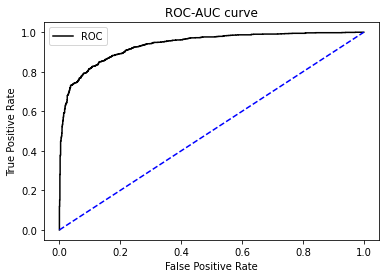

In [122]:
plt.plot(fpr,tpr,color='k',label='ROC')
plt.plot([0,1],[0,1],color='b',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC curve')
plt.legend()

# Saving the Model

In [123]:
import joblib
joblib.dump(model,'Churn.obj')

['Churn.obj']